In [1]:
from cellori import Cellori
import pandas as pd
import glob


# all import statements
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import tifffile
import pandas as pd
import seaborn as sns
import time
import os
import glob
from skimage import measure
import skimage.measure as skmeas
from PyQt5 import QtCore, QtGui, QtWidgets

from statannot import add_stat_annotation

Image.MAX_IMAGE_PIXELS = None

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [203]:
#Third Replicate 


#Path to files from Step1
main_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/20220412_Cas12_rep3/Cellori_clean"
#"/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220930_Cas12/Cellori_clean"
paths_to_all_pik = glob.glob(main_path+"/*.pkl")



colony_all_files = []
colony_hold = []
colony_name = []
colony_well = []
colony_gRNA = []

for i in paths_to_all_pik:
    #print("         " + i )
    name_gRNA = i.split("/")[-1].split('.')[0].split('Plate')[-1][0:9]#

    
    name_compare = i.split("/")[-1].split('.')[0].split('Plate')[-1][0:4]#
    well_compare = i.split("/")[-1].split('.')[0].split('clean')[-1][15:40]#[0:4]#
        
    if i.split("/")[-1].split('.')[0].split('Plate')[-1][0:5] != 'Rosa23':
    #name_compare = 'Rosa1'

        df_points = pd.read_pickle(i)


        #Get all colony sizes
        for k,m in enumerate(np.unique(df_points['colonyID'])):
            if m != -1:
                colony_hold.append(len(df_points.loc[df_points['colonyID'] == m]))
                colony_name.append(name_compare)
                colony_well.append(well_compare)
                colony_gRNA.append(name_gRNA)

    #     flat_list = [item for sublist in colony_hold for item in sublist]             
        colony_all_files.append(colony_hold)

d = {'values':colony_hold,'names':colony_name,'well':colony_well, 'gRNA': colony_gRNA}
# Create the pandas DataFrame
df = pd.DataFrame(data=d)
 
df3 = df[df['values']>1]   


# Calculate expanding clones
colony_all_files_norm = []
big_keep = []
len_colony = []
well_id = []
big = 2**7.5 # time grown
want = np.unique(df3.well)
name_id = []

name_gRNA = []
for i,m in enumerate(want):
    
    a =df3.loc[df3['well'] == m]['values']
    
    big_keep.append(100*len([ k for k in a if k > big ])/len(a))
    
    len_colony.append(len(a))
    
    a =np.unique(df3.loc[df3['well'] == m]['well'])
    
    well_id.append(a[0])
    
    a_n =np.unique(df3.loc[df3['well'] == m]['names'])
    name_id.append(a_n[0])
    
    
    a_n =np.unique(df3.loc[df3['well'] == m]['gRNA'])
    name_gRNA.append(a_n[0])

    
d = {'Percent of expanding colonies per well':big_keep,'names':name_id,'well':well_id,'num_col':len_colony, 'gRNA': name_gRNA}
# Create the pandas DataFrame
df_hist3 = pd.DataFrame(data=d)

df_hist3 = df_hist3[df_hist3['gRNA'] != 'Rosa2_1_W']

df_hist3 = df_hist3[df_hist3['gRNA'] != 'Rosa2_2_W']

In [311]:
#Second Replicate 


#Path to files from Step1
main_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/20220412_Cas12_rep2/Cellori_clean"
#"/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220930_Cas12/Cellori_clean"
paths_to_all_pik = glob.glob(main_path+"/*.pkl")


colony_all_files = []
colony_hold = []
colony_name = []
colony_well = []
colony_gRNA = []
want = ['Rosa_Well1','Rosa_Well2','Rosa_Well3','Rosa_Well4','Rosa_Well5','Rosa_Well6','plate10_We','plate8_Wel','plate9_Wel']

for i in paths_to_all_pik:
    #print("         " + i )
    name_gRNA = i.split("/")[-1].split('Plate')[1][0:10]

    if name_gRNA in set(want):
        
        
        name_compare = "Rosa"
        
        if name_gRNA in set(['Rosa_Well1','Rosa_Well2','Rosa_Well3']):
            name_gRNA = 'Rosa_1'
        
        if name_gRNA in set(['Rosa_Well4','Rosa_Well5','Rosa_Well6']):
            name_gRNA = 'Rosa_2'

        if name_gRNA in set(['plate10_We','plate8_Wel','plate9_Wel']):
            name_compare = "DKK1"
        
        well_compare = i.split("/")[-1].split('Plate')[1][0:15]


        df_points = pd.read_pickle(i)


        #Get all colony sizes
        for k,m in enumerate(np.unique(df_points['colonyID'])):
            if m != -1:
                colony_hold.append(len(df_points.loc[df_points['colonyID'] == m]))
                colony_name.append(name_compare)
                colony_well.append(well_compare)
                colony_gRNA.append(name_gRNA)

    #     flat_list = [item for sublist in colony_hold for item in sublist]             
        colony_all_files.append(colony_hold)

d = {'values':colony_hold,'names':colony_name,'well':colony_well, 'gRNA': colony_gRNA}
# Create the pandas DataFrame
df = pd.DataFrame(data=d)
 
df2 = df[df['values']>1]


# Calculate expanding clones
colony_all_files_norm = []
big_keep = []
len_colony = []
well_id = []
big = 2**7.5 # time grown
want = np.unique(df2.well)
name_id = []

name_gRNA = []
for i,m in enumerate(want):
    
    a =df2.loc[df2['well'] == m]['values']
    
    big_keep.append(100*len([ k for k in a if k > big ])/len(a))
    
    len_colony.append(len(a))
    
    a =np.unique(df2.loc[df2['well'] == m]['well'])
    
    well_id.append(a[0])
    
    a_n =np.unique(df2.loc[df2['well'] == m]['names'])
    name_id.append(a_n[0])
    
    
    a_n =np.unique(df2.loc[df2['well'] == m]['gRNA'])
    name_gRNA.append(a_n[0])

    
d = {'Percent of expanding colonies per well':big_keep,'names':name_id,'well':well_id,'num_col':len_colony, 'gRNA': name_gRNA}
# Create the pandas DataFrame
df_hist2 = pd.DataFrame(data=d)

In [325]:
#First Replicate 


#Path to files from Step1
main_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/20220412_Cas12_rep1/Cellori_clean"
#"/Volumes/4TDATA_RAR/RAR/Shaffer_Scope/20220930_Cas12/Cellori_clean"
paths_to_all_pik = glob.glob(main_path+"/*.pkl")


colony_all_files = []
colony_hold = []
colony_name = []
colony_well = []
colony_gRNA = []


for i in paths_to_all_pik:
    #print("         " + i )
    name_gRNA = i.split("/")[-1].split('Cas12_')[1][0:10]
    
    
    name_compare = "No"

    if name_gRNA in set(['Rosa_Well1','Rosa_Well2','Rosa_Well3']):
        name_gRNA = 'Rosa_1'
        name_compare = "Rosa"

    if name_gRNA in set(['Rosa_Well4','Rosa_Well5','Rosa_Well6']):
        name_gRNA = 'Rosa_2'
        name_compare = "Rosa"
        
    if name_gRNA[0:2] in set(['11','10','12']):
        name_gRNA = 'DKK1_' + name_gRNA[0:2]
        name_compare = "DKK1"
    
    if name_compare != "No":


    #         name_compare = i.split("/")[-1].split('.')[0].split('Plate')[-1][0:4]#
        well_compare = i.split("/")[-1].split('.')[0].split('clean')[-1][42:52]


        df_points = pd.read_pickle(i)


        #Get all colony sizes
        for k,m in enumerate(np.unique(df_points['colonyID'])):
            if m != -1:
                colony_hold.append(len(df_points.loc[df_points['colonyID'] == m]))
                colony_name.append(name_compare)
                colony_well.append(well_compare)
                colony_gRNA.append(name_gRNA)

    #     flat_list = [item for sublist in colony_hold for item in sublist]             
        colony_all_files.append(colony_hold)

        
d = {'values':colony_hold,'names':colony_name,'well':colony_well, 'gRNA': colony_gRNA}
# Create the pandas DataFrame
df = pd.DataFrame(data=d)

df1 = df[df['values']>1]


# Calculate expanding clones
colony_all_files_norm = []
big_keep = []
len_colony = []
well_id = []
big = 2**8.5 # time grown
want = np.unique(df1.well)
name_id = []

name_gRNA = []
for i,m in enumerate(want):
    
    a =df1.loc[df1['well'] == m]['values']
    
    big_keep.append(100*len([ k for k in a if k > big ])/len(a))
    
    len_colony.append(len(a))
    
    a =np.unique(df1.loc[df1['well'] == m]['well'])
    
    well_id.append(a[0])
    
    a_n =np.unique(df1.loc[df1['well'] == m]['names'])
    name_id.append(a_n[0])
    
    
    a_n =np.unique(df1.loc[df1['well'] == m]['gRNA'])
    name_gRNA.append(a_n[0])

    
d = {'Percent of expanding colonies per well':big_keep,'names':name_id,'well':well_id,'num_col':len_colony, 'gRNA': name_gRNA}
# Create the pandas DataFrame
df_hist1 = pd.DataFrame(data=d)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Rosa v.s. DKK1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.809e-01 U_stat=3.790e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DKK1 v.s. Rosa: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.539e-12 U_stat=1.335e+05
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DKK1 v.s. Rosa: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.055e-02 U_stat=3.310e+05


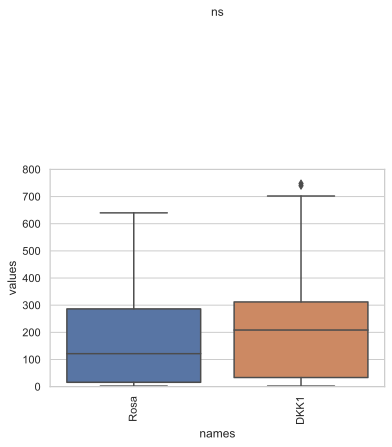

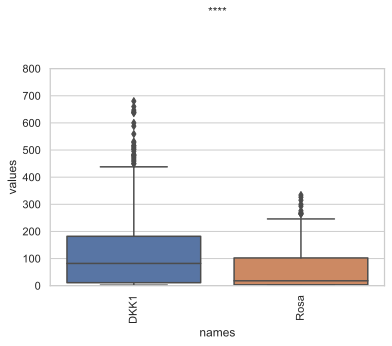

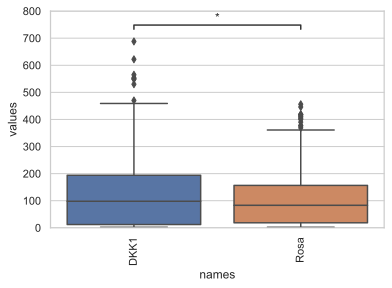

In [326]:

#Rep 1
plt.figure(1)

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="names", y="values", data=df1)


ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
locs=ax.get_xticks()

add_stat_annotation(ax, data=df1,
                    x = "names",
                    y = "values",
                    box_pairs=[("Rosa", "DKK1")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.ylim(0,800)
output_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/plots"
plt.savefig(output_path+"/box_rep1.pdf", bbox_inches='tight')


# Rep 2
plt.figure(2)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="names", y="values", data=df2)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
locs=ax.get_xticks()


add_stat_annotation(ax, data=df2,
                    x = "names",
                    y = "values",
                    box_pairs=[("Rosa", "DKK1")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.ylim(0,800)
output_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/plots"
plt.savefig(output_path+"/box_rep2.pdf", bbox_inches='tight')

#Rep 3
plt.figure(3)
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="names", y="values", data=df3)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
locs=ax.get_xticks()


add_stat_annotation(ax, data=df3,
                    x = "names",
                    y = "values",
                    box_pairs=[("Rosa", "DKK1")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.ylim(0,800)
output_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/plots"
plt.savefig(output_path+"/box_rep3.pdf", bbox_inches='tight')


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DKK1 v.s. Rosa: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.171e-01 U_stat=5.350e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Rosa v.s. DKK1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.160e-02 U_stat=2.150e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Rosa v.s. DKK1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.898e-05 U_stat=1.350e+01


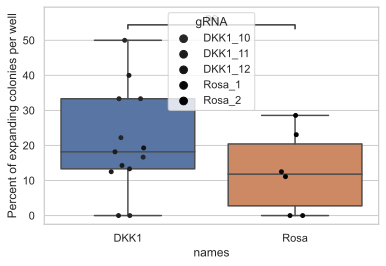

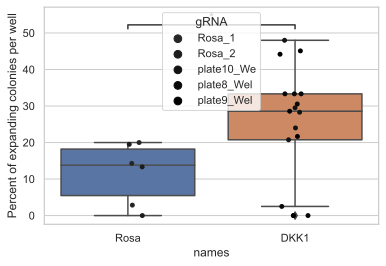

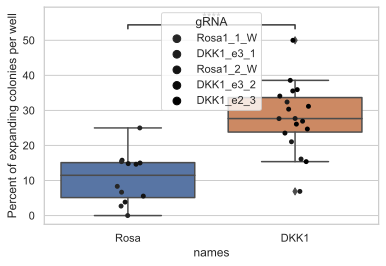

In [327]:
#Rep 1
plt.figure(1)
ax = sns.boxplot(x = "names",
            y = "Percent of expanding colonies per well",
            data = df_hist1)


ax = sns.stripplot(x = "names",
            y = "Percent of expanding colonies per well",
                    hue="gRNA",
              color = 'black',
            data = df_hist1)

add_stat_annotation(ax, data=df_hist1,
                    x = "names",
                    y = "Percent of expanding colonies per well",
                    box_pairs=[("Rosa", "DKK1")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


output_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/plots/"
plt.savefig(output_path + "Highly_proliferative_rep1.pdf", bbox_inches='tight')

# Rep 2


plt.figure(2)
ax = sns.boxplot(x = "names",
            y = "Percent of expanding colonies per well",
            data = df_hist2)


ax = sns.stripplot(x = "names",
            y = "Percent of expanding colonies per well",
                    hue="gRNA",
              color = 'black',
            data = df_hist2)

add_stat_annotation(ax, data=df_hist2,
                    x = "names",
                    y = "Percent of expanding colonies per well",
                    box_pairs=[("Rosa", "DKK1")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


output_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/plots/"
plt.savefig(output_path + "Highly_proliferative_rep2.pdf", bbox_inches='tight')



# Rep 2
plt.figure(3)
ax = sns.boxplot(x = "names",
            y = "Percent of expanding colonies per well",
            data = df_hist3)


ax = sns.stripplot(x = "names",
            y = "Percent of expanding colonies per well",
                    hue="gRNA",
              color = 'black',
            data = df_hist3)

add_stat_annotation(ax, data=df_hist3,
                    x = "names",
                    y = "Percent of expanding colonies per well",
                    box_pairs=[("Rosa", "DKK1")],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)


output_path = "/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR046/plots/"
plt.savefig(output_path + "Highly_proliferative_rep3.pdf", bbox_inches='tight')
